# **I. Regresion Lineal**
* Y = a + b * x
* x: 100 valores distribuidos segun una N(1.5,2.5)
* Ye = 5 + 1.9 * x + e
* e estara distribuido segun una N(0,0.8)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = 1.5 + 2.5 * np.random.randn(100)

In [ ]:
res = 0 + 0.8*np.random.randn(100)

In [ ]:
y_pred = 5 + 1.9 * x        # Si se prueba con 0.3 (en lugar de 1.9) todo cambiaria

In [ ]:
y_act  = 5 + 1.9 * x + res  # Si se prueba con 0.3 (en lugar de 1.9) todo cambiaria

In [ ]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [ ]:
data = pd.DataFrame({"x":x_list,
                     "y_act":y_act_list,
                     "y_pred":y_pred_list })

In [ ]:
data.head()

,x,y_act,y_pred
0,0.068236,5.710056,5.129648
1,3.099250,11.144942,10.888575
2,0.924764,5.975716,6.757051
3,7.446876,19.176525,19.149065
4,1.000986,7.043619,6.901874


In [ ]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Prediccion')

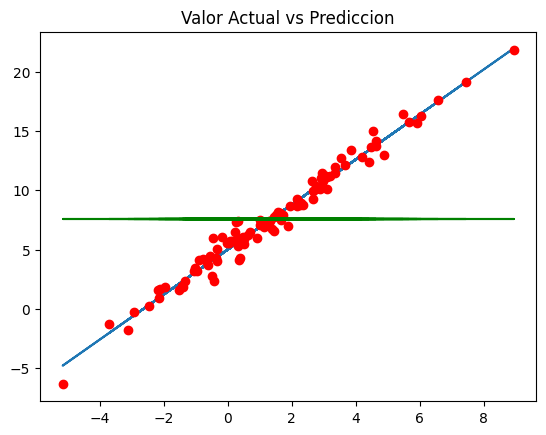

In [ ]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"g")
plt.title("Valor Actual vs Prediccion")

In [ ]:
data["SSR"] = (data['y_pred']-np.mean(y_act))**2
data["SSD"] = (data['y_pred']-data['y_act'])**2
data["SST"] = (data['y_act']-np.mean(y_act))**2
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,0.068236,5.710056,5.129648,5.945744,0.336873,3.452096
1,3.099250,11.144942,10.888575,11.025968,0.065724,12.794245
2,0.924764,5.975716,6.757051,0.657700,0.610484,2.535489
3,7.446876,19.176525,19.149065,134.120180,0.000754,134.756963
4,1.000986,7.043619,6.901874,0.443775,0.020092,0.275015


In [ ]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

print("SST: ",SST)
print("SSR: ",SSR)
print("SSD: ",SSD)
print("R2: ", SSR/SST)

SST:  2265.5094551163384
SSR:  2220.379421975401
SSD:  52.51250264951196
R2:  0.9800795211695023


(array([ 3.,  3.,  8., 14., 26., 22., 10.,  6.,  4.,  4.]),
 array([-1.83356288, -1.46583102, -1.09809916, -0.7303673 , -0.36263544,
         0.00509642,  0.37282828,  0.74056014,  1.108292  ,  1.47602386,
         1.84375571]),
 <BarContainer object of 10 artists>)

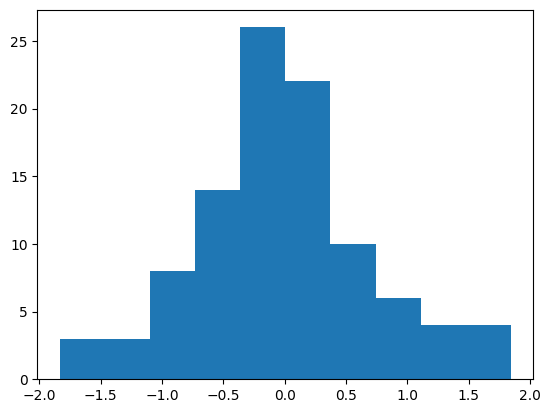

In [ ]:
#  Diferencia entre los valores observados y los valores predichos por el modelo
plt.hist(data['y_pred']-data['y_act'])

## Obteniendo la recta de regresión

* y = b0 + b1 * x
* b1 = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)  --> cov(x,y)/var(x,y)
* b0 = y_m - b1 * x_m

In [ ]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_act'])
x_mean,y_mean

(1.3393241412275705, 7.568037908995215)

In [ ]:
data['beta_1_n'] = (data['x']-x_mean)*(data['y_act']-y_mean)
data['beta_1_d'] = (data['x']-x_mean)**2

beta1 = sum(data['beta_1_n'])/sum(data['beta_1_d'])
beta0 = y_mean - beta1*x_mean

beta0,beta1

(5.027490228634035, 1.8968878422758932)

In [ ]:
data['y_model'] = beta0 + beta1*data['x']
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_1_n,beta_1_d,y_model
0,0.068236,5.710056,5.129648,5.945744,0.336873,3.452096,2.361659,1.615665,5.156926
1,3.099250,11.144942,10.888575,11.025968,0.065724,12.794245,6.295087,3.097340,10.906420
2,0.924764,5.975716,6.757051,0.657700,0.610484,2.535489,0.660114,0.171860,6.781663
3,7.446876,19.176525,19.149065,134.120180,0.000754,134.756963,70.899436,37.302191,19.153379
4,1.000986,7.043619,6.901874,0.443775,0.020092,0.275015,0.177431,0.114473,6.926249


In [ ]:
SSR_2 = sum((data['y_model']-y_mean)**2)
SSD_2 = sum((data['y_model']-data['y_act'])**2)
SST_2 = sum((data['y_act']-y_mean)**2)

print("SST: ",SST_2)
print("SSR: ",SSR_2)
print("SSD: ",SSD_2)
print("R2: ", SSR_2/SST_2)

SST:  2265.5094551163384
SSR:  2213.057301292799
SSD:  52.45215382353774
R2:  0.9768475237633268


Text(0.5, 1.0, 'Valor Actual vs Prediccion')

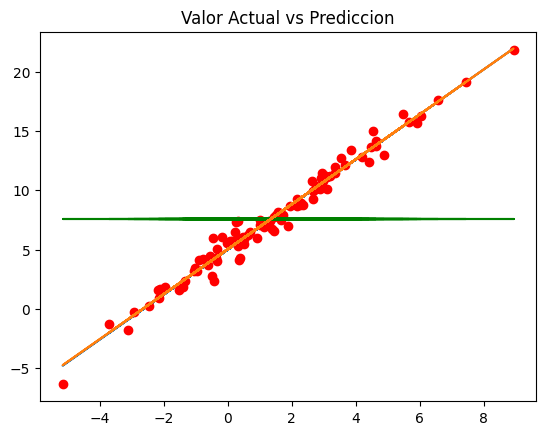

In [ ]:
%matplotlib inline
y_mean2 = [np.mean(y_act) for i in range(1,len(x_list)+1)]
plt.plot(data['x'],data['y_pred'])
plt.plot(data['x'],data['y_act'],"ro")
plt.plot(data['x'],y_mean2,"g")
plt.plot(data['x'],data['y_model'])
plt.title("Valor Actual vs Prediccion")

## Error estándar de los residuos (RSE)

In [ ]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.732012201927352

In [ ]:
# Promedio
np.mean(data['y_act'])

7.568037908995215

In [ ]:
RSE / np.mean(data['y_act'])

0.09672417220020757

In [ ]:
# Se observa incrementos de un 11% del error debido al uso del modelo

# **II. Regresion LIneal Simple**

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17776, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 17776 (delta 17), reused 62 (delta 15), pack-reused 17706
Receiving objects: 100% (17776/17776), 530.50 MiB | 11.51 MiB/s, done.
Resolving deltas: 100% (350/350), done.
Updating files: 100% (16940/16940), done.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from google.colab import files
import glob

## **Stats Models**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as smf

In [ ]:
path_udm = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Udemy/1. Machine_Learning/Seccion 101/datasets/'
filename = "ads/Advertising.csv"
fullpath = os.path.join(path_udm, filename)

Este dataset contiene informacion del gasto de publicidad en TV, radio y periodico para un producto en particular y el resultado en ventas que se ha observado despues de esas 200 campañas de marketing.

* Ya se habia observado que existia una correlacion positiva entre el gasto de marketing en algunas plataformas y las ventas que se habian experimentado.
* Ejemplo: El gasto en TV parecia muy correlacionado con las ventas.

Intentaremos buscar una relacion lineal (simple) entre **el gasto de TV y las ventas**

In [ ]:
data = pd.read_csv(fullpath)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
lm = smf.ols(formula='Sales~TV',data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.47e-42
Time:                        04:41:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [ ]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal seria:
Sales = 7.32594 + 0.047537*TV

Un incremento en 100 unidades de publicidad en TV se traduciria en 4.7 ventas adicionales

**p-valor**

 Los parametros tienen un p-valor asociado
 * si es pequeño, se puede decir que el parametro no es cero (significancia estadistica)
 * si es grande, se puede decir que no es un parametro significativo

In [ ]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

 Los p-valores son extremadamente pequeños, podemos decir que los parametros son significativos (no son cero)

**R2**

Eficacia del modelo

In [ ]:
lm.rsquared

0.611875050850071

**f-stadistico**

debe ser grande mientras que su p-valor asociado debe ser muy pequeño para decir que los parametros son significativos y no nulos

In [ ]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

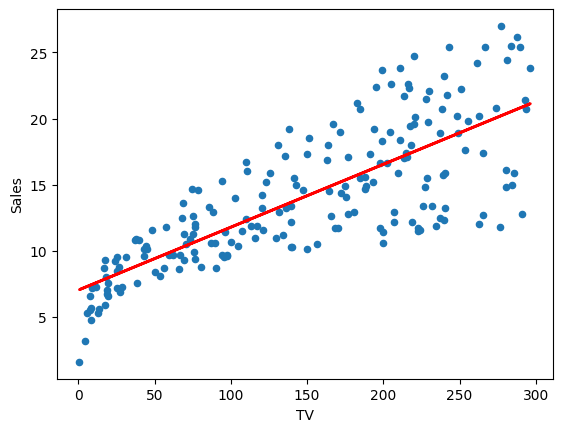

In [ ]:
%matplotlib inline
data.plot(kind='scatter',x="TV",y="Sales")
plt.plot(pd.DataFrame(data['TV']),sales_pred,c='red',linewidth=2)

In [ ]:
# Analsisis del Error
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]
data["RSE"] = (data["Sales"]-data["sales_pred"])**2
# Suma de cuadrados de diferencias (SSD)
SSD = sum(data["RSE"])
print("* SSD: ",SSD)

# Desviacion tipica de los residuos
RSE = np.sqrt(SSD/(len(data)-2))
print("* RSE: ", RSE)

# Promedio de las ventas
sales_m = np.mean(data["Sales"])
print("* promedioVentas: ", sales_m)
print("* Error no explicado: ",RSE/sales_m)

* SSD:  2102.5305838896525
* RSE:  3.258656369238098
* promedioVentas:  14.0225
* Error no explicado:  0.23238768901680143


In [ ]:
# La varianza (o desviacion tipica) del modelo que no fue correctamente explicada representa el 23%

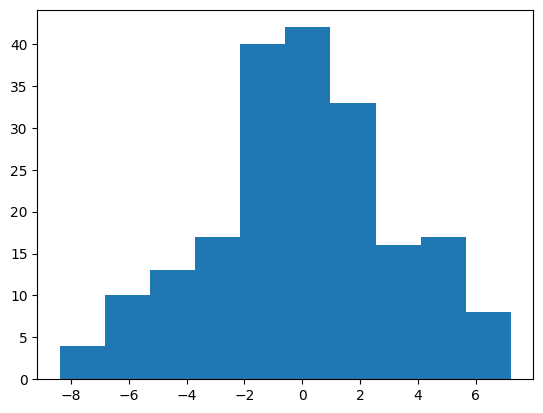

In [ ]:
# Distribucion del error
plt.hist((data["Sales"]-data["sales_pred"]));

In [ ]:
# Se distribuye de manera que tiende a ser normal (media = 0 y desviacion 1)
# Desviacion tipica residual (RSE) de 3.25, el numero de ventas promedio son 14 y el ratio de
# error es de 23%

# Por un lado el modelo esta seguro de lo que esta prediciendo (no son cero), pero por otro lado
# el 23% del modelo es incapaz de explicar las discrepancias. Este valor es grande, por lo cual se debe buscar ajustar

# Se debe buscar siempre reducir ese error
# Mejorar el R2 y de reducir la suma de los errores residuales (RSE)

# Tal vez deberiamos considerar otra variable, con esto evuluciaonaria a un modelo de regresion multiple

# III. Regresión lineal Múltiple
## El paquete statsmodel para regresión múltiple
* Sales ~TV
* Sales ~Newspaper
* Sales ~Radio
* Sales ~TV+Newspaper
* Sales ~TV+Radio
* Sales ~Newspaper+Radio
* Sales ~TV+Newspaper+Radio

## **Añade Newspaper**

In [ ]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()
print(lm2.params)

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64


In [ ]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948+0.046901 * TV + 0.044219 * Newspaper

In [ ]:
# El modelo suguiera que los tres parametros son buenos y no son nulos

In [ ]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

print("R2: ",lm2.rsquared)
print("SSD: ", SSD)
print("RSE: ", RSE)
print("error: ",RSE/sales_m)

R2:  0.6458354938293271
SSD:  1918.561811896827
RSE:  3.120719860252885
error:  0.2225508903728212


In [ ]:
# Al añadir la variable Newspaper, el error estandas (RSE) ha disminuido de 3.25 a 3.12 (No ha sido mucho)
# El error deja de explicar el 22.2% del modelo

In [ ]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 24 May 2024   Prob (F-statistic):           3.95e-45
Time:                        04:41:46   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.0

## **Añade Radio**

In [ ]:
#Añadir el Newspaper al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 24 May 2024   Prob (F-statistic):           4.83e-98
Time:                        04:41:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [ ]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

print("R2: ",lm3.rsquared)
print("SSD: ", SSD)
print("RSE: ", RSE)
print("error: ",RSE/sales_m)

R2:  0.8971942610828956
SSD:  556.9139800676185
RSE:  1.6813609125080011
error:  0.11990450436855062


In [ ]:
# El modelo solo deja de explicar un 11.9% a comparacion del 22.2% anterior

## **Añade Radio + Newspaper**

In [ ]:
#Añadir el Newspaper al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 24 May 2024   Prob (F-statistic):           1.58e-96
Time:                        04:41:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))

print("R2: ",lm4.rsquared)
print("SSD: ", SSD)
print("RSE: ", RSE)
print("error: ",RSE/sales_m)

R2:  0.8972106381789522
SSD:  556.8252629021869
RSE:  1.6855103734147436
error:  0.12020041885646236


In [ ]:
# El modelo deja de explicar un 12%. Añadir el newspaper ha sido contraproducente

## Multicolinealidad

Relacion que existe entre las variables predictoras

En este caso, el periodico esta relacionado con la radio y esta relacion (entre variables predictoras) incrementa la variablilidad del coeficiente estimado para la variable predictora. Es un problema ya que el hecho que las dos formen parte del modelo, una interactua negativamente con la otra.
Estas variables deberian eliminarse del modelo

#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

Se debe calcular para todas las variables del modelo

In [ ]:
data_prev = pd.read_csv(fullpath)
data_prev.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### **VIF**

In [ ]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
print("VIF Newspaper: ", VIF)

VIF Newspaper:  1.1451873787239288


In [ ]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
print("VIF TV: ", VIF)

VIF TV:  1.00461078493965


In [ ]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
print("VIF Radio: ", VIF)

VIF Radio:  1.1449519171055353


*El periodico y la radio tienen casi el mismo VIF, esto significa que estas variables estan correlacionadas entre ellas (pero no con la tv)*

*El modelo con las tres variables no mejora*

# **IV. Validacion del modelo**

In [ ]:
data = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")

(array([ 5., 10., 19., 35., 40., 33., 33., 11.,  9.,  5.]),
 array([-2.37509535, -1.88677089, -1.39844642, -0.91012196, -0.42179749,
         0.06652698,  0.55485144,  1.04317591,  1.53150037,  2.01982484,
         2.5081493 ]),
 <BarContainer object of 10 artists>)

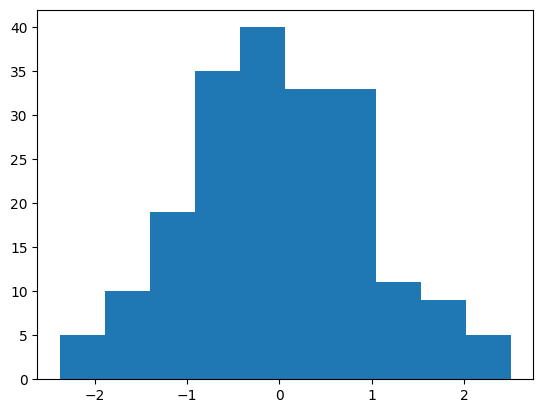

In [ ]:
a = np.random.randn(len(data))
plt.hist(a)

In [ ]:
check = (a<0.8)
training = data[check]
testing = data[~check]
print("Train: ",len(training))
print("Test: ",len(testing))

Train:  163
Test:  37


In [ ]:
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     663.6
Date:                Fri, 24 May 2024   Prob (F-statistic):           3.47e-78
Time:                        04:41:46   Log-Likelihood:                -321.13
No. Observations:                 163   AIC:                             648.3
Df Residuals:                     160   BIC:                             657.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9112      0.335      8.699      0.0

Sales = 2.9336 + 0.0465 * TV + 0.1807 * Radio

## **Validacion**

In [ ]:
sales_pred = lm.predict(testing)
SSD = sum((testing["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(testing)-2-1))
# Porcentaje sin explicar del modelo
sales_mean = np.mean(testing["Sales"])

print("R2: ",lm.rsquared)
print("SSD: ", SSD)
print("RSE: ", RSE)
print("error: ",RSE/sales_m)

R2:  0.8924128841583415
SSD:  67.896248722983
RSE:  1.413134279483886
error:  0.10077620106856024


In [ ]:
# El modelo deja de explicar un 10%. Generaliza igual de bien en el entrenamiento como en el testeo
# No existe overfitting

# **V. Seleccion de Rasgos**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
data = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")
feature_cols = ["TV", "Radio", "Newspaper"]

In [ ]:
X = data[feature_cols]
Y = data["Sales"]

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)  # n_features_to_select: Numero deseado de variables predictoras
selector = selector.fit(X,Y)

In [ ]:
selector.support_

array([ True,  True, False])

In [ ]:
# Indica que fueron seleccionadas las variables: TV y Radio

In [ ]:
selector.ranking_

array([1, 1, 2])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_pred = X[["TV", "Radio"]]
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression()

In [ ]:
print(lm.intercept_)  # Alfa
print(lm.coef_)
print("R2: ",lm.score(X_pred, Y)) # R2

2.9210999124051362
[0.04575482 0.18799423]
R2:  0.8971942610828957


# VI. Tratamiento de variables categóricas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/python-ml-course/datasets/ecom-expense/Ecom Expense.csv")

In [ ]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [ ]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [ ]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False


In [ ]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False


In [ ]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [ ]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False


In [ ]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False


In [ ]:
feature_cols = ["Monthly Income", "Transaction Time",
                "Gender_Female", "Gender_Male",
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]

In [ ]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [ ]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [ ]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [ ]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Female', -131.02501325554573),
 ('Gender_Male', 131.02501325554587),
 ('City_Tier 1', 76.76432601049486),
 ('City_Tier 2', 55.138974309232765),
 ('City_Tier 3', -131.90330031972772),
 ('Record', 772.2334457445643)]

In [ ]:
lm.score(X,Y)

0.9179923586131016

In [ ]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [ ]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False,3581.980335


In [ ]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
sales_mean=np.mean(df_new["Total Spend"])
error = RSE/sales_mean

print("SSD: ",SSD)
print("RSE: ",RSE)
print("mean: ",sales_mean)
print("error: ",error*100)

SSD:  1517733985.340816
RSE:  803.1318809818165
mean:  6163.176415976715
error:  13.03113568029416


In [ ]:
# El 13% no puede explicar el modelo
# Es decir, se va a gastar 6163 en promedio con desviacion +-803.13

## Eliminar variables dummy redundantes

In [ ]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,False
1,False
2,True
3,False
4,False


In [ ]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,False,False
1,True,False
2,True,False
3,False,False
4,True,False


In [ ]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,False,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,True,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,False,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,False,True,False


In [ ]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [ ]:
print(lm.intercept_)

-133.67781754642238


In [ ]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205752),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Male', 262.05002651109413),
 ('City_Tier 2', -21.625351701262886),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.2334457445638)]

In [ ]:
lm.score(X,Y)

0.9179923586131016

In [ ]:
# Es un modelo simplificado sacando las variales dummy

# VII. Transformación de variables para conseguir una relación no lineal

In [ ]:
import pandas as pd

In [ ]:
data_auto = pd.read_csv("/content/python-ml-course/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
data_auto.shape

(406, 9)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

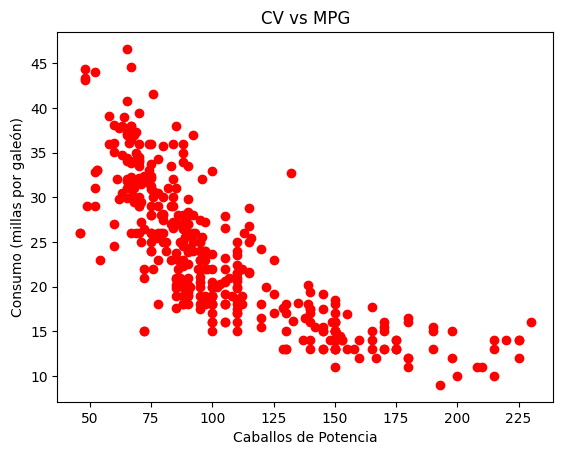

In [ ]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

In [ ]:
# La relacion no se ve tan lineal, parece mas cuadratica o exponencial

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [ ]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean()).to_numpy()
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis]

In [ ]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(X_data)

numpy.ndarray

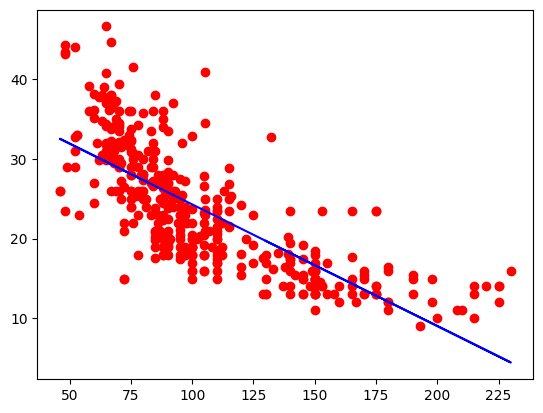

In [ ]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [ ]:
lm.score(X_data, Y)

0.5746533406450252

In [ ]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(10315.751960060918, 5.046879480825511, 23.514572864321607, 21.462773361633474)

In [ ]:
# SSD = 10315, la desviacion tipica es 5. Con un galon de gasolina se harian 23millas (+- 5 millas) lo cual supone un error del 21%

### Modelo de regresión cuadrático
* mpg = a + b * horsepower^2

In [ ]:
X_data = X**2
X_data = np.asarray(X_data)
X_data = X_data[:,np.newaxis]

In [ ]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [ ]:
lm.score(X_data, Y)

0.4849887034823205

In [ ]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

In [ ]:
# SSD = 12490, la desviacion tipica es 5.5. Con un galon de gasolina se harian 23millas (+- 5 millas) lo cual supone un error del 23.6%
# No parece ser el mejor resultado

### Modelo de regresión  lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
poly = PolynomialFeatures(degree=2)

In [ ]:
X = np.asarray(X)
X_data = poly.fit_transform(X[:,np.newaxis])

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [ ]:
lm.score(X_data, Y)

0.6439066584257469

In [ ]:
# Aumenta el r2, lo cual mejor el modelo

In [ ]:
lm.intercept_

55.026192447081144

In [ ]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 -0.434 * hp + 0.00112615 * hp^2

# Incrementando el grado del polinomio

In [ ]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(round(error*100,2))+ "%")

In [ ]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(X_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)

    regresion_validation(X_data, Y, lm.predict(X_data))
    print('\n')

Regresión de grado 2
R2:0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.514572864321607, error: 19.64%


Regresión de grado 3
R2:0.6444678885560744
58.44877411148572
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.514572864321607, error: 19.62%


Regresión de grado 4
R2:0.6467674189704502
40.09664384880571
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.514572864321607, error: 19.56%


Regresión de grado 5
R2:0.6547512491371936
-40.69402885502241
[ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.17138877377, RSE: 4.546921734122057, Y_mean: 23.514572864321607, error: 19.34%


Regresión de grado 6
R2:0.6572852671632741
-156.9852070648205
[ 0.00000000e+00  1.07622445e+01 -2.3016

# **Resumen**

## **Reg Lineal**

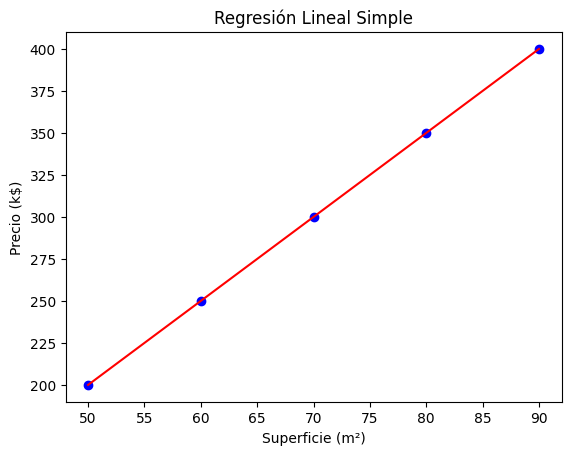

Intercepto (β0): -49.99999999999994
Pendiente (β1): 4.999999999999999
R²: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos
X = np.array([50, 60, 70, 80, 90]).reshape(-1, 1)
y = np.array([200, 250, 300, 350, 400])

# Crear el modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes
intercept = model.intercept_
slope = model.coef_[0]

# Predicciones
y_pred = model.predict(X)

# Visualización
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (k$)')
plt.title('Regresión Lineal Simple')
plt.show()

# Resultados
print(f'Intercepto (β0): {intercept}')
print(f'Pendiente (β1): {slope}')
print(f'R²: {model.score(X, y)}')

## **Reg Ridge**

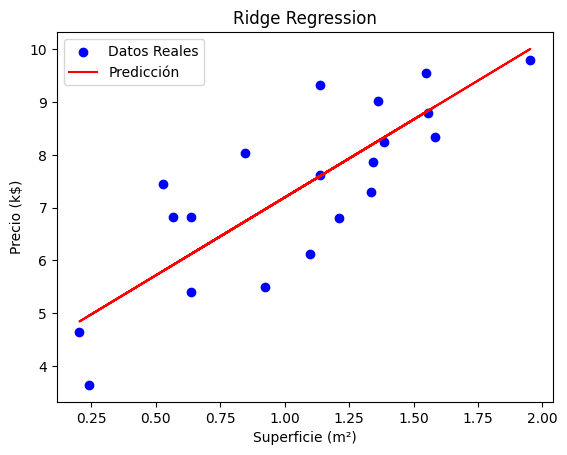

Intercepto (β0): [6.94733759]
Coeficientes (β): [[1.76631465]]
R² en el conjunto de entrenamiento: 0.7596440298086288
R² en el conjunto de prueba: 0.6530272229111949


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Datos simulados
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Ridge Regression con un valor de lambda
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = ridge_reg.predict(X_test_scaled)

# Visualización
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (k$)')
plt.title('Ridge Regression')
plt.legend()
plt.show()

# Resultados
print(f'Intercepto (β0): {ridge_reg.intercept_}')
print(f'Coeficientes (β): {ridge_reg.coef_}')
print(f'R² en el conjunto de entrenamiento: {ridge_reg.score(X_train_scaled, y_train)}')
print(f'R² en el conjunto de prueba: {ridge_reg.score(X_test_scaled, y_test)}')

## **Reg Lasso**

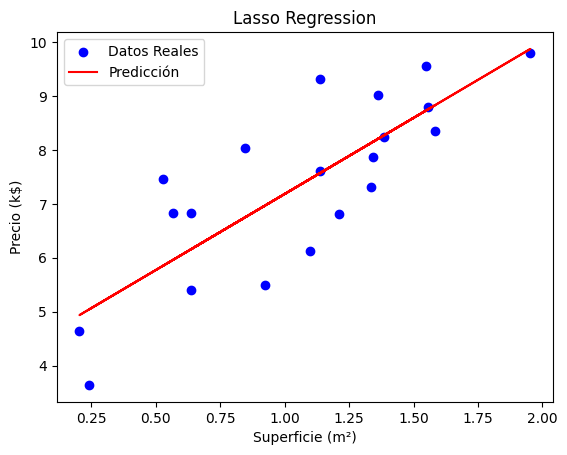

Intercepto (β0): [6.94733759]
Coeficientes (β): [1.68839358]
R² en el conjunto de entrenamiento: 0.757384356075103
R² en el conjunto de prueba: 0.6542970151305121


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Datos simulados
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Lasso Regression con un valor de lambda
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred = lasso_reg.predict(X_test_scaled)

# Visualización
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (k$)')
plt.title('Lasso Regression')
plt.legend()
plt.show()

# Resultados
print(f'Intercepto (β0): {lasso_reg.intercept_}')
print(f'Coeficientes (β): {lasso_reg.coef_}')
print(f'R² en el conjunto de entrenamiento: {lasso_reg.score(X_train_scaled, y_train)}')
print(f'R² en el conjunto de prueba: {lasso_reg.score(X_test_scaled, y_test)}')

## **Elastic Net**

Puntuación R^2: -0.002583762166268988


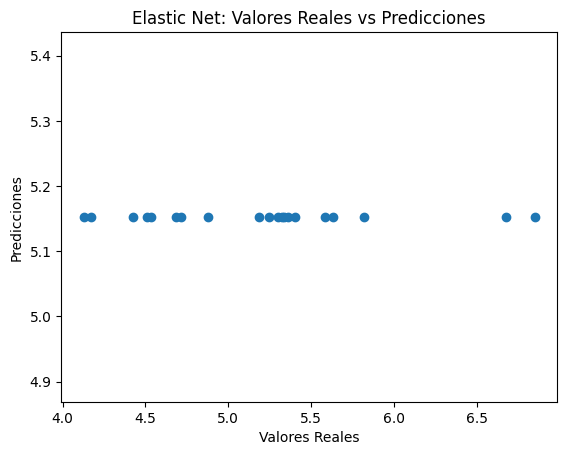

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

# Datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 10)
y = 3 + np.dot(X, np.random.rand(10)) + np.random.randn(100)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo Elastic Net
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Predicciones
y_pred = elastic_net.predict(X_test)

# Evaluar el modelo
score = elastic_net.score(X_test, y_test)
print(f"Puntuación R^2: {score}")

# Gráfico de resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Elastic Net: Valores Reales vs Predicciones')
plt.show()

Mejor valor de alpha: 0.016337958766499613
Mejor valor de l1_ratio: 0.5
Puntuación R^2 con CV: 0.10745368071833217


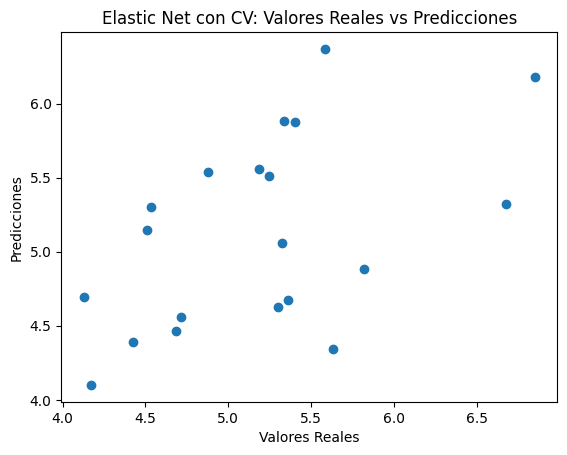

In [16]:
from sklearn.linear_model import ElasticNetCV

# Crear y ajustar el modelo Elastic Net con validación cruzada
elastic_net_cv = ElasticNetCV(cv=5, random_state=42)
elastic_net_cv.fit(X_train, y_train)

# Mejor valor de alpha y l1_ratio
best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

print(f"Mejor valor de alpha: {best_alpha}")
print(f"Mejor valor de l1_ratio: {best_l1_ratio}")

# Predicciones
y_pred_cv = elastic_net_cv.predict(X_test)

# Evaluar el modelo
score_cv = elastic_net_cv.score(X_test, y_test)
print(f"Puntuación R^2 con CV: {score_cv}")

# Gráfico de resultados
plt.scatter(y_test, y_pred_cv)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Elastic Net con CV: Valores Reales vs Predicciones')
plt.show()

## **Reg Polinomica**

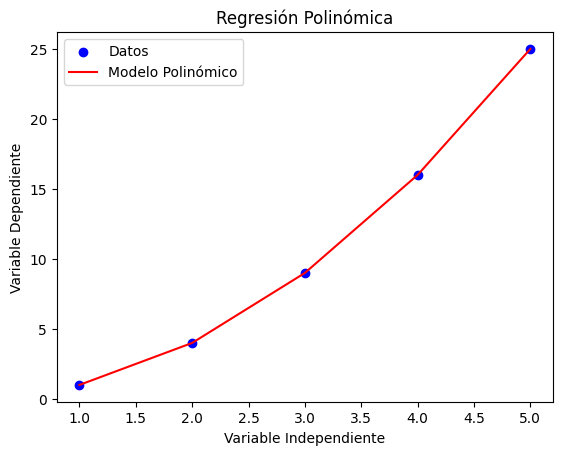

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Datos de ejemplo
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 4, 9, 16, 25])

# Crear modelo de regresión polinómica de grado 2
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

model.fit(X, y)
y_pred = model.predict(X)

# Gráfico de resultados
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, y_pred, color='red', label='Modelo Polinómico')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.title('Regresión Polinómica')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    5
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            1
Date:                Sat, 06 Jul 2024   Pseudo R-squ.:                   1.000
Time:                        05:24:29   Log-Likelihood:            -5.0138e-10
converged:                      False   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                  0.009480
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -110.4353   2.23e+05     -0.000      1.000   -4.38e+05    4.38e+05
x1            44.2438   9.07e+04      0.000      1.000   -1.78e+0

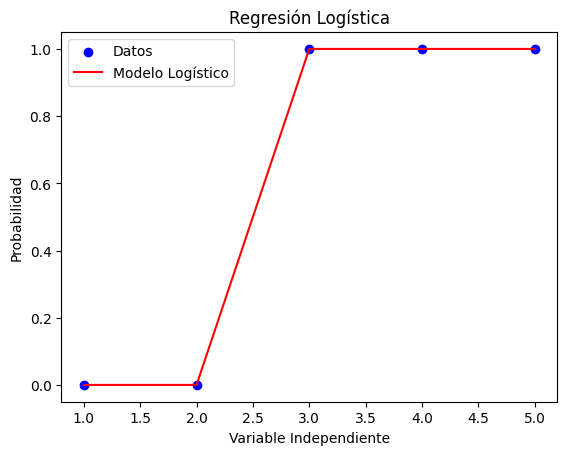

In [13]:
import numpy as np
import statsmodels.api as sm

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])

# Agregar constante para el intercepto
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión logística
model = sm.Logit(y, X).fit()
print(model.summary())

# Predicciones
y_pred = model.predict(X)

# Gráfico de resultados
plt.scatter(X[:, 1], y, color='blue', label='Datos')
plt.plot(X[:, 1], y_pred, color='red', label='Modelo Logístico')
plt.xlabel('Variable Independiente')
plt.ylabel('Probabilidad')
plt.legend()
plt.title('Regresión Logística')
plt.show()

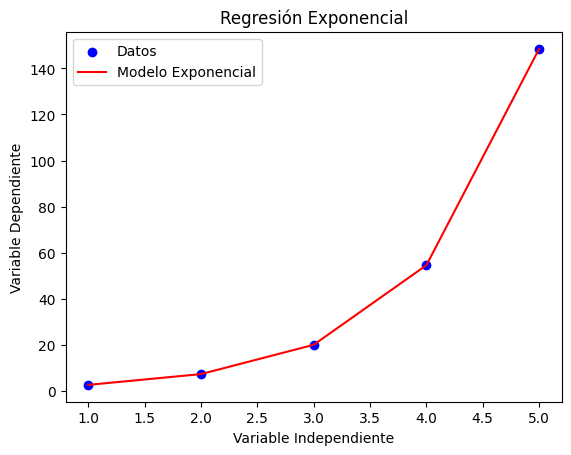

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([2.7, 7.4, 20.1, 54.6, 148.4])

# Definir la función exponencial
def exponencial(x, a, b):
    return a * np.exp(b * x)

# Ajustar el modelo
params, covariance = curve_fit(exponencial, X, y)
a, b = params

# Predicciones
y_pred = exponencial(X, a, b)

# Gráfico de resultados
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, y_pred, color='red', label='Modelo Exponencial')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.title('Regresión Exponencial')
plt.show()

## **Descenso Gradiente**

In [1]:
import numpy as np

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 1.3, 3.75, 2.25])

# Parámetros iniciales
theta_0, theta_1 = 0.0, 0.0
alpha = 0.01  # Tasa de aprendizaje
num_iterations = 1000

m = len(y)

# Función de costo
def compute_cost(X, y, theta_0, theta_1):
    return (1/(2*m)) * np.sum((theta_0 + theta_1 * X - y) ** 2)

# Descenso de gradiente
for _ in range(num_iterations):
    y_pred = theta_0 + theta_1 * X
    d_theta_0 = (1/m) * np.sum(y_pred - y)
    d_theta_1 = (1/m) * np.sum((y_pred - y) * X)
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1

print(f"theta_0: {theta_0}, theta_1: {theta_1}")

theta_0: 0.6708650580918951, theta_1: 0.456613548748866


# **Graficos Regresion**

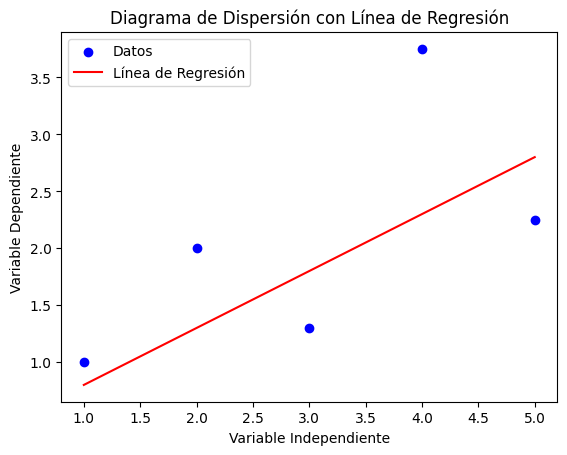

In [3]:
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 1.3, 3.75, 2.25])
theta_0, theta_1 = 0.3, 0.5  # Parámetros del modelo de regresión

# Crear gráfico
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, theta_0 + theta_1 * X, color='red', label='Línea de Regresión')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.show()

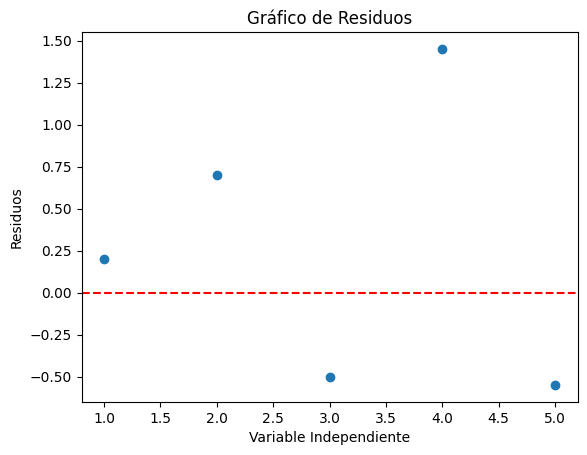

In [4]:
# Cálculo de residuos
residuos = y - (theta_0 + theta_1 * X)

# Crear gráfico de residuos
plt.scatter(X, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Variable Independiente')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

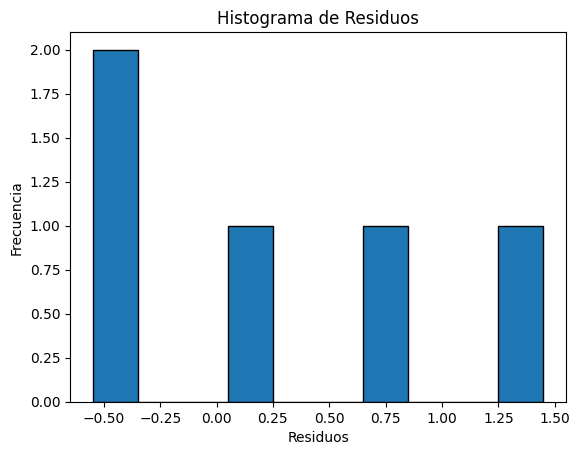

In [5]:
# Crear histograma de residuos
plt.hist(residuos, bins=10, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

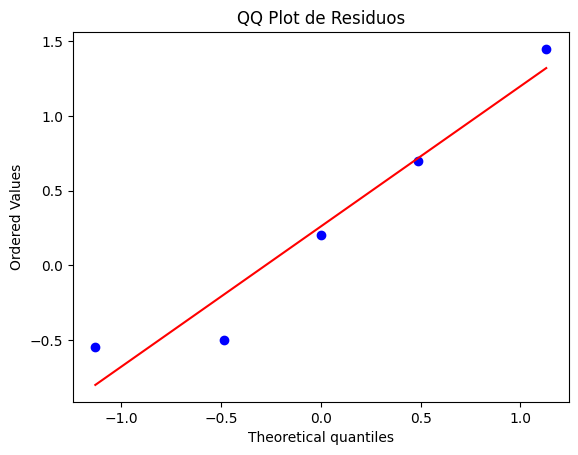

In [6]:
import scipy.stats as stats

# Crear QQ plot
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('QQ Plot de Residuos')
plt.show()

AttributeError: 'dict' object has no attribute 'index'

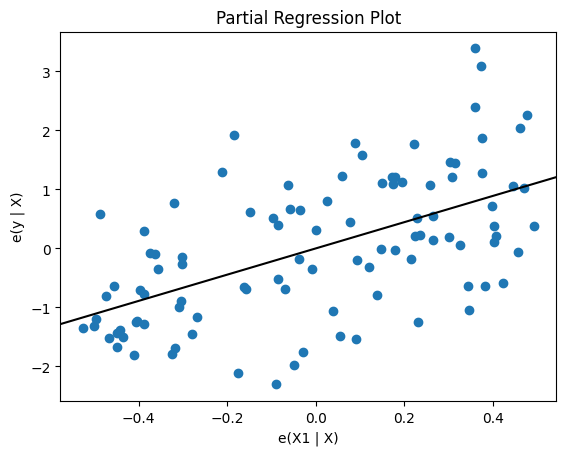

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Datos de ejemplo para regresión múltiple
X1 = np.random.rand(100)
X2 = np.random.rand(100)
y = 3 + 2*X1 - 1*X2 + np.random.randn(100)

# Modelo de regresión
data = {'X1': X1, 'X2': X2, 'y': y}
model = smf.ols('y ~ X1 + X2', data=data).fit()

# Gráfico de regresión parcial
fig = sm.graphics.plot_partregress('y', 'X1', ['X2'], data=data)
plt.show()

<ipython-input-8-e278f2150cd7>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)


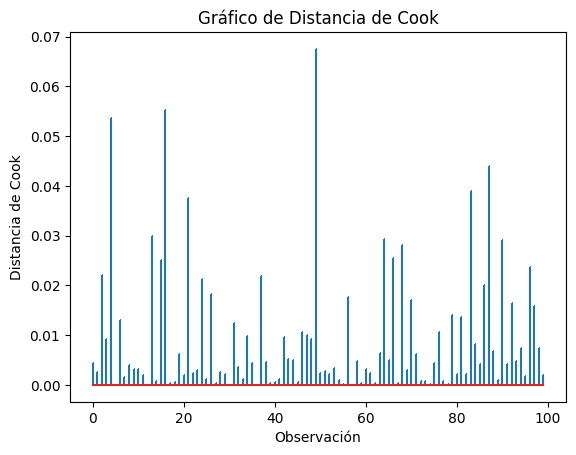

In [8]:
# Crear gráfico de distancia de Cook
influence = model.get_influence()
(c, p) = influence.cooks_distance

plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.xlabel('Observación')
plt.ylabel('Distancia de Cook')
plt.title('Gráfico de Distancia de Cook')
plt.show()

# **Supuestos Regresion**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     30.79
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           2.45e-07
Time:                        05:15:31   Log-Likelihood:                -141.51
No. Observations:                 100   AIC:                             287.0
Df Residuals:                      98   BIC:                             292.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2222      0.193     16.670      0.0

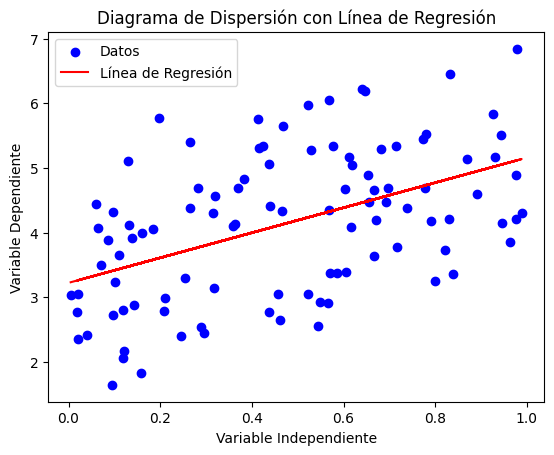

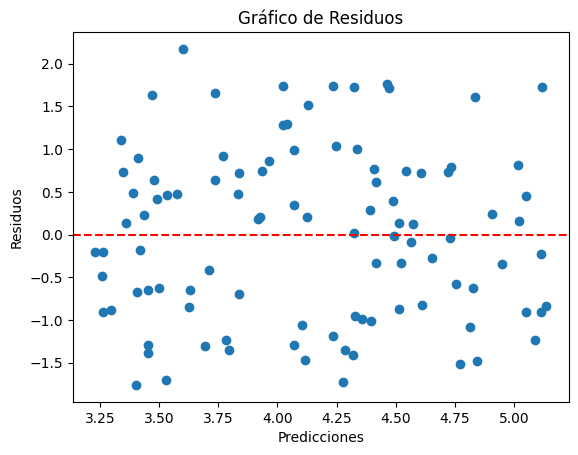

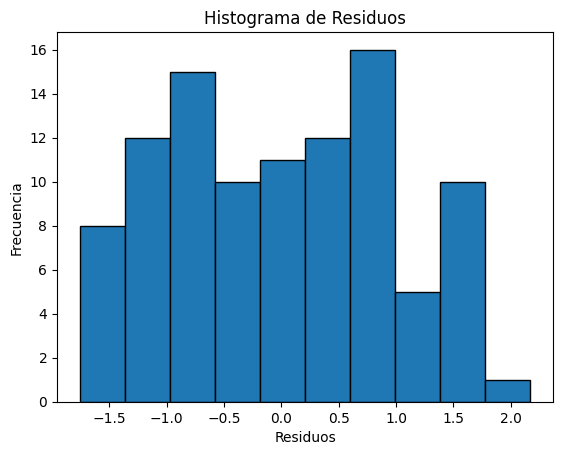

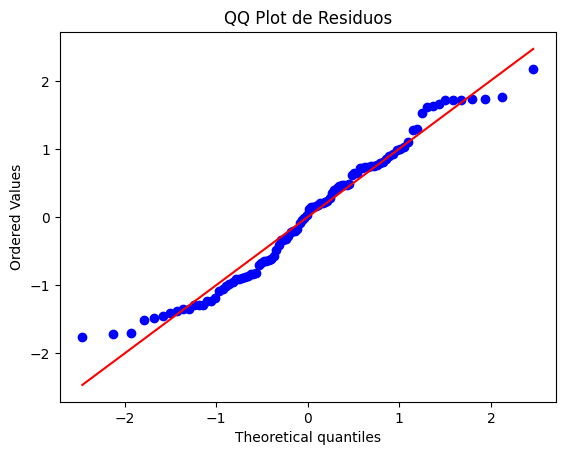

  feature       VIF
0   const  3.689363
1       X  1.000000


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd

# Datos de ejemplo
np.random.seed(0)
X = np.random.rand(100)
y = 3 + 2*X + np.random.randn(100)

# Agregar constante a X para el intercepto
X = sm.add_constant(X)

# Ajustar modelo de regresión
model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfico de dispersión con línea de regresión
plt.scatter(X[:, 1], y, color='blue', label='Datos')
plt.plot(X[:, 1], model.fittedvalues, color='red', label='Línea de Regresión')
plt.xlabel('Variable Independiente')
plt.ylabel('Variable Dependiente')
plt.legend()
plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.show()

# Gráfico de residuos
residuos = model.resid
plt.scatter(model.fittedvalues, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

# Histograma de residuos
plt.hist(residuos, bins=10, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# QQ plot de residuos
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('QQ Plot de Residuos')
plt.show()

# Factor de inflación de la varianza (VIF) para colinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suponiendo que hay más variables independientes en X
# X = sm.add_constant(data[['X1', 'X2', 'X3']])
vif_data = pd.DataFrame()
vif_data["feature"] = ['const', 'X']
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif_data)

## **Interpretacion Coeficientes**

In [17]:
import numpy as np
import statsmodels.api as sm

# Datos de ejemplo
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Agregar constante para el intercepto
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.582e+30
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           1.67e-46
Time:                        05:37:46   Log-Likelihood:                 161.95
No. Observations:                   5   AIC:                            -319.9
Df Residuals:                       3   BIC:                            -320.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.109e-15   2.81e-15     -1.107      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# **Seleccion Variables**

In [2]:
import pandas as pd
import numpy as np

# Establecer una semilla para reproducibilidad
np.random.seed(0)

# Generar datos ficticios
n = 100
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = np.random.normal(0, 1, n)
X4 = np.random.normal(0, 1, n)
X5 = np.random.normal(0, 1, n)

# Variable dependiente con una relación lineal con X1 y X2, más ruido
Y = 2 * X1 + 3 * X2 + np.random.normal(0, 1, n)

# Crear un DataFrame
data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5})

# Mostrar las primeras filas del DataFrame
data.head()

,Y,X1,X2,X3,X4,X5
0,9.560289,1.764052,1.883151,-0.369182,-1.306527,-0.598654
1,-3.277205,0.400157,-1.347759,-0.239379,1.658131,-1.115897
2,-0.757632,0.978738,-1.270485,1.099660,-0.118164,0.766663
3,7.155761,2.240893,0.969397,0.655264,-0.680178,0.356293
4,-0.131705,1.867558,-1.173123,0.640132,0.666383,-1.768538


In [3]:
import statsmodels.api as sm

def forward_selection(data, response):
    initial_features = []
    remaining_features = list(data.columns)
    remaining_features.remove(response)
    selected_features = []

    while remaining_features:
        results = []
        for feature in remaining_features:
            model = sm.OLS(data[response], sm.add_constant(data[selected_features + [feature]])).fit()
            results.append((model.aic, feature))

        results.sort()
        best_aic, best_feature = results[0]
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

        print(f"Selected {best_feature} with AIC: {best_aic}")

    return selected_features

selected_features = forward_selection(data, 'Y')
print("Selected features using forward selection:", selected_features)

Selected X2 with AIC: 447.2127213409524
Selected X1 with AIC: 292.401479066948
Selected X4 with AIC: 287.52594914699324
Selected X3 with AIC: 286.7736575318469
Selected X5 with AIC: 287.76011877398423
Selected features using forward selection: ['X2', 'X1', 'X4', 'X3', 'X5']


In [4]:
import statsmodels.api as sm

def backward_elimination(data, response):
    features = list(data.columns)
    features.remove(response)

    while len(features) > 0:
        model = sm.OLS(data[response], sm.add_constant(data[features])).fit()
        p_values = model.pvalues.iloc[1:]  # omit constant
        max_p_value = p_values.max()

        if max_p_value > 0.05:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            print(f"Removed {excluded_feature} with p-value: {max_p_value}")
        else:
            break

    return features

selected_features = backward_elimination(data, 'Y')
print("Selected features using backward elimination:", selected_features)

Removed X5 with p-value: 0.3303114129443191
Removed X3 with p-value: 0.10679741934190384
Selected features using backward elimination: ['X1', 'X2', 'X4']


# **SHAP**

In [20]:
!pip install --upgrade shap

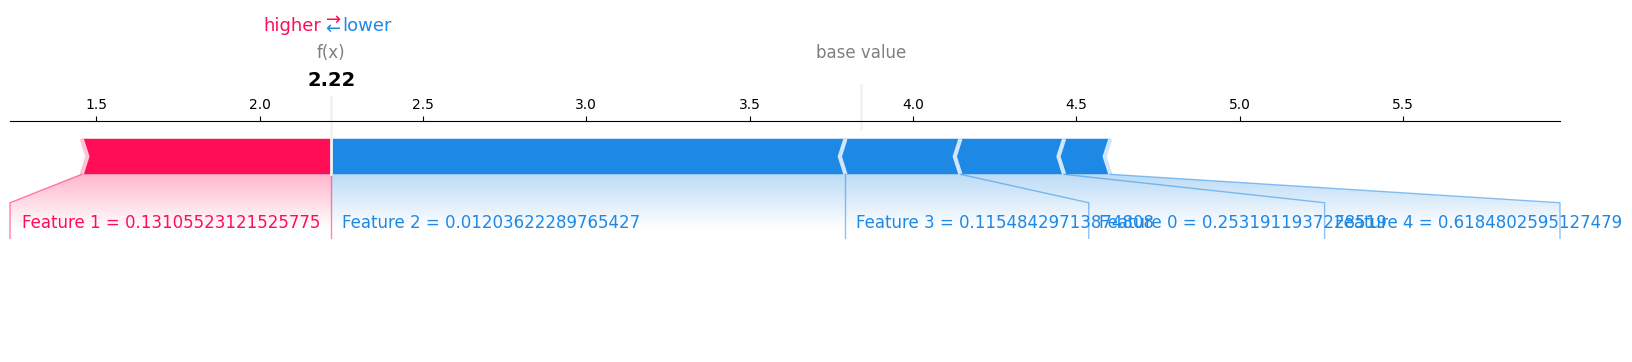

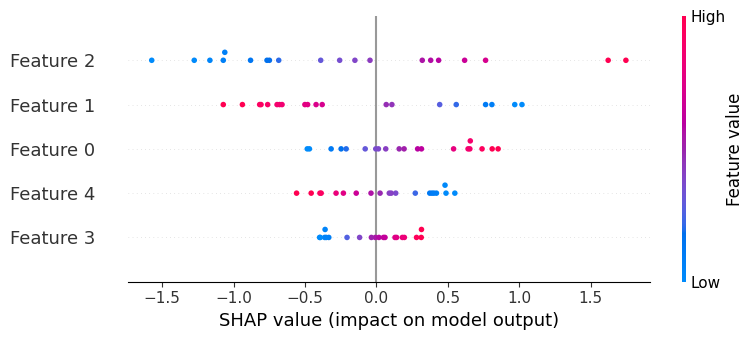

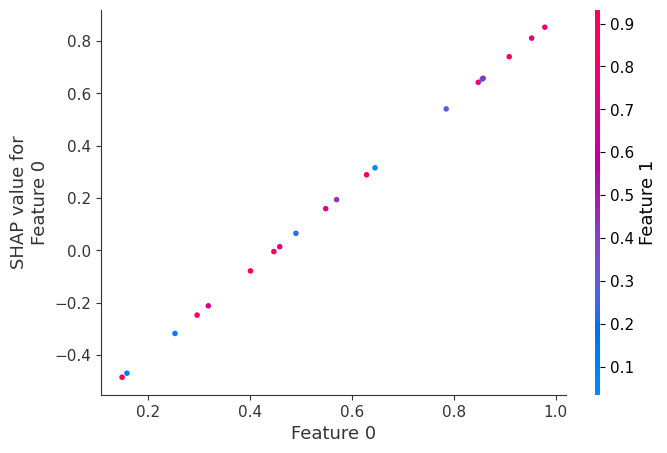

In [23]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 5)
y = 3 + np.dot(X, [1.5, -2, 3, 0.5, -1]) + np.random.randn(100)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Crear un objeto de SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Gráficos de SHAP

# Gráfico de fuerza para una sola predicción
shap.initjs()
shap.force_plot(shap_values[0], matplotlib=True)

# Gráfico de fuerza para una sola predicción en Jupyter Notebook
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test[0])

# Gráfico de resumen (beeswarm plot)
shap.summary_plot(shap_values.values, X_test)

# Gráfico de dependencia para una característica específica
shap.dependence_plot(0, shap_values.values, X_test)  # Para la primera característica